In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies=pd.read_csv(r"C:\Users\aksha\Downloads\Movie (1).csv")
movies

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [5]:
movies['movie'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [6]:
movies['rating'].unique()

array([4. , 5. , 4.5, 3. , 1. , 3.5, 1.5, 2. , 2.5, 0.5])

In [7]:
len(movies['userId'].unique())

4081

In [8]:
movies['rating'].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

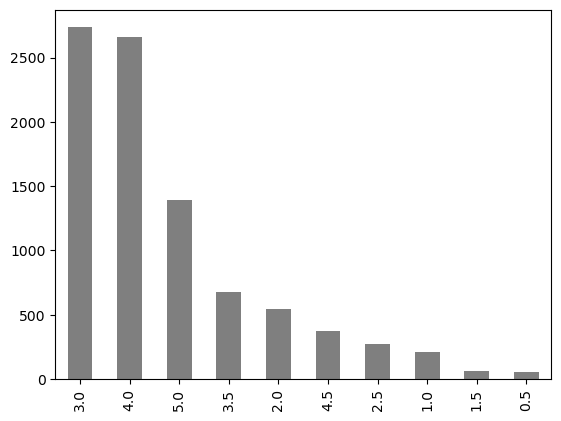

In [9]:
movies['rating'].value_counts().plot(kind='bar',color='black',alpha=.5)
plt.show()

In [10]:
toy=movies[movies['movie']=='Toy Story (1995)']
toy

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
2564,7110,Toy Story (1995),4.0
2565,7116,Toy Story (1995),4.0
2566,7117,Toy Story (1995),4.0
2567,7119,Toy Story (1995),5.0


In [11]:
avg_rating=movies.groupby('movie').agg('mean')['rating'].sort_values(ascending=True)
avg_rating

movie
Waiting to Exhale (1995)              3.000000
Sudden Death (1995)                   3.017327
Father of the Bride Part II (1995)    3.143836
Grumpier Old Men (1995)               3.186861
Jumanji (1995)                        3.268398
Tom and Huck (1995)                   3.352564
Sabrina (1995)                        3.381429
GoldenEye (1995)                      3.427003
Heat (1995)                           3.836508
Toy Story (1995)                      3.959323
Name: rating, dtype: float64

<Axes: ylabel='movie'>

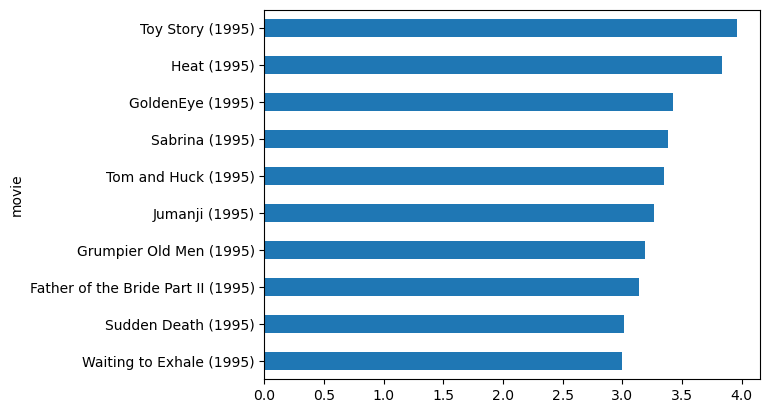

In [12]:
avg_rating.plot(kind='barh')

In [13]:
user_count=movies.groupby('movie').agg('count')['rating'].sort_values(ascending=True)
user_count.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of movie
Tom and Huck (1995)                     78
Waiting to Exhale (1995)               138
Sudden Death (1995)                    202
Father of the Bride Part II (1995)     657
Grumpier Old Men (1995)                685
Sabrina (1995)                         700
Jumanji (1995)                        1155
Heat (1995)                           1260
GoldenEye (1995)                      1548
Toy Story (1995)                      2569
Name: rating, dtype: int64>

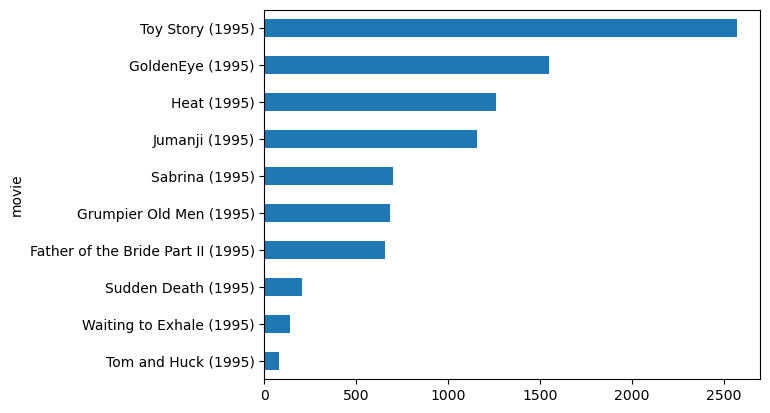

In [14]:
user_count.plot(kind='barh')
plt.show()

In [15]:
movies.isnull().sum()

userId    0
movie     0
rating    0
dtype: int64

In [16]:
use_movie_matrix=pd.pivot_table(data=movies,columns='movie',index='userId',values='rating')

In [17]:
use_movie_matrix

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [18]:
use_movie_matrix.isnull().sum()

movie
Father of the Bride Part II (1995)    3424
GoldenEye (1995)                      2533
Grumpier Old Men (1995)               3396
Heat (1995)                           2821
Jumanji (1995)                        2926
Sabrina (1995)                        3381
Sudden Death (1995)                   3879
Tom and Huck (1995)                   4003
Toy Story (1995)                      1512
Waiting to Exhale (1995)              3943
dtype: int64

In [19]:
use_movie_matrix.fillna(0,inplace=True)
use_movie_matrix

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


### User similarity Matrix using cosine similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
user_similarity_matrix=cosine_similarity(use_movie_matrix)
user_similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

### we replace diagonal elements(1) with 0

In [22]:
np.fill_diagonal(user_similarity_matrix,0)
user_similarity_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [23]:
user_similarity_df=pd.DataFrame(data=user_similarity_matrix,index=movies.userId.unique(),columns=movies.userId.unique())
user_similarity_df

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


### consider userid=11

### users similar to user 11

In [24]:
user_similarity_df[11].sort_values(ascending=False)

3       1.0
497     1.0
743     1.0
703     1.0
698     1.0
       ... 
1003    0.0
1001    0.0
990     0.0
5014    0.0
5557    0.0
Name: 11, Length: 4081, dtype: float64

### 3 most similar users

In [25]:
similar_user=user_similarity_df[11].sort_values(ascending=False).head(3)
similar_user

3      1.0
497    1.0
743    1.0
Name: 11, dtype: float64

### now we need to find the ratings for movies given by 3,497,743

In [26]:
sim_user_list=similar_user.index.to_list()
sim_user_list

[3, 497, 743]

In [42]:
movies[(movies['userId']==3) | (movies['userId']==11)]

,userId,movie,rating
0,3,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [27]:
use_movie_matrix

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [28]:
sim_rating=use_movie_matrix.loc[sim_user_list]
sim_rating

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
497,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
743,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


### finding argsort for each column ,here the highest value index  will be last 

In [29]:
sim_rating.values.argsort()

array([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [0, 1, 2, 4, 5, 6, 7, 8, 9, 3],
       [1, 2, 3, 5, 6, 7, 8, 9, 0, 4]], dtype=int64)

### taking the last column only

In [30]:
movie_names=sim_rating.values.argsort()[:,-1].tolist()
movie_names

[8, 3, 4]

In [31]:
sim_rating.columns.values[movie_names]

array(['Toy Story (1995)', 'Heat (1995)', 'Jumanji (1995)'], dtype=object)

### so we are going to suggest 'Toy Story (1995)', 'Heat (1995)', 'Jumanji (1995)' these movies to the user 11,this is user_user similarity

### Item-Item Simlilarity

In [32]:
movie_user_matrix=use_movie_matrix.T
movie_user_matrix

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5


### find the cosine similarity for movies

In [33]:
movie_similarity_matrix=cosine_similarity(movie_user_matrix)
movie_similarity_matrix

array([[1.        , 0.21599275, 0.45566216, 0.24736744, 0.27980393,
        0.39574604, 0.22645759, 0.16293622, 0.30863759, 0.16378738],
       [0.21599275, 1.        , 0.21819777, 0.39773907, 0.40226034,
        0.22145469, 0.1552551 , 0.11972423, 0.38348625, 0.12844824],
       [0.45566216, 0.21819777, 1.        , 0.2901502 , 0.24471005,
        0.39017783, 0.25538652, 0.14395914, 0.31691062, 0.1564475 ],
       [0.24736744, 0.39773907, 0.2901502 , 1.        , 0.2800876 ,
        0.26207226, 0.25562862, 0.06285821, 0.40011642, 0.12402064],
       [0.27980393, 0.40226034, 0.24471005, 0.2800876 , 1.        ,
        0.24667163, 0.14328579, 0.19637377, 0.40998238, 0.14767896],
       [0.39574604, 0.22145469, 0.39017783, 0.26207226, 0.24667163,
        1.        , 0.20155614, 0.16464129, 0.31043392, 0.1894145 ],
       [0.22645759, 0.1552551 , 0.25538652, 0.25562862, 0.14328579,
        0.20155614, 1.        , 0.09721338, 0.16679265, 0.15179972],
       [0.16293622, 0.11972423, 0.1439591

In [34]:
np.fill_diagonal(movie_similarity_matrix,0)
movie_similarity_matrix

array([[0.        , 0.21599275, 0.45566216, 0.24736744, 0.27980393,
        0.39574604, 0.22645759, 0.16293622, 0.30863759, 0.16378738],
       [0.21599275, 0.        , 0.21819777, 0.39773907, 0.40226034,
        0.22145469, 0.1552551 , 0.11972423, 0.38348625, 0.12844824],
       [0.45566216, 0.21819777, 0.        , 0.2901502 , 0.24471005,
        0.39017783, 0.25538652, 0.14395914, 0.31691062, 0.1564475 ],
       [0.24736744, 0.39773907, 0.2901502 , 0.        , 0.2800876 ,
        0.26207226, 0.25562862, 0.06285821, 0.40011642, 0.12402064],
       [0.27980393, 0.40226034, 0.24471005, 0.2800876 , 0.        ,
        0.24667163, 0.14328579, 0.19637377, 0.40998238, 0.14767896],
       [0.39574604, 0.22145469, 0.39017783, 0.26207226, 0.24667163,
        0.        , 0.20155614, 0.16464129, 0.31043392, 0.1894145 ],
       [0.22645759, 0.1552551 , 0.25538652, 0.25562862, 0.14328579,
        0.20155614, 0.        , 0.09721338, 0.16679265, 0.15179972],
       [0.16293622, 0.11972423, 0.1439591

In [35]:
movie_sim=pd.DataFrame(data=movie_similarity_matrix,columns=movies.movie.unique(),index=movies.movie.unique())

In [36]:
movie_sim

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995)
Toy Story (1995),0.000000,0.215993,0.455662,0.247367,0.279804,0.395746,0.226458,0.162936,0.308638,0.163787
Jumanji (1995),0.215993,0.000000,0.218198,0.397739,0.402260,0.221455,0.155255,0.119724,0.383486,0.128448
Grumpier Old Men (1995),0.455662,0.218198,0.000000,0.290150,0.244710,0.390178,0.255387,0.143959,0.316911,0.156447
Waiting to Exhale (1995),0.247367,0.397739,0.290150,0.000000,0.280088,0.262072,0.255629,0.062858,0.400116,0.124021
Father of the Bride Part II (1995),0.279804,0.402260,0.244710,0.280088,0.000000,0.246672,0.143286,0.196374,0.409982,0.147679
Heat (1995),0.395746,0.221455,0.390178,0.262072,0.246672,0.000000,0.201556,0.164641,0.310434,0.189415
Sabrina (1995),0.226458,0.155255,0.255387,0.255629,0.143286,0.201556,0.000000,0.097213,0.166793,0.151800
Tom and Huck (1995),0.162936,0.119724,0.143959,0.062858,0.196374,0.164641,0.097213,0.000000,0.095521,0.148723
Sudden Death (1995),0.308638,0.383486,0.316911,0.400116,0.409982,0.310434,0.166793,0.095521,0.000000,0.138524
GoldenEye (1995),0.163787,0.128448,0.156447,0.124021,0.147679,0.189415,0.151800,0.148723,0.138524,0.000000


### consider user 11

In [37]:
sim_movie=use_movie_matrix[use_movie_matrix.index==3]
sim_movie

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


### Now find the movies similar to Toy story

In [38]:
movie_sim.loc['Toy Story (1995)'] 

Toy Story (1995)                      0.000000
Jumanji (1995)                        0.215993
Grumpier Old Men (1995)               0.455662
Waiting to Exhale (1995)              0.247367
Father of the Bride Part II (1995)    0.279804
Heat (1995)                           0.395746
Sabrina (1995)                        0.226458
Tom and Huck (1995)                   0.162936
Sudden Death (1995)                   0.308638
GoldenEye (1995)                      0.163787
Name: Toy Story (1995), dtype: float64

### Here Grumpier Old Men (1995) and Heat (1995) have high similarity so we can suggest these movies to the user 11

In [39]:
 books=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Books.csv")

C:\Users\aksha\AppData\Local\Temp\ipykernel_34488\3222772618.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Books.csv")


In [40]:
books


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [41]:
len(books['ISBN'].unique())

271360